End-to-End Machine Learning Project

# 1.Working with Real Data
Popular open data repositories:  
— UC Irvine Machine Learning Repository   
— Kaggle datasets  
— Amazon’s AWS datasets  
• Meta portals (they list open data repositories):   
— http://dataportals.org/  
— http://opendatamonitor.eu/  
— http://quandl.com/  
• Other pages listing many popular open data repositories:   
— Wikipedia’s list of Machine Learning datasets  
— Quora.com question  
— Datasets subreddit  

# 2.Look at the Big Picture
## 2.1 Machine Learning projects checklists  
1. Frame the problem and look at the big picture.  
2. Get the data.  
3. Explore the data to gain insights.  
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.  
5. Explore many different models and short-list the best ones.  
6. Fine-tune your models and combine them into a great solution.  
7. Present your solution.  
8. Launch, monitor, and maintain your system.  
Obviously, you should feel free to adapt this checklist to your needs.

A sequence of data processing *components* is called a data *pipeline*.  
it is clearly a typical supervised learning task since you are given labeled training examples  
it is also a typical regression task, since you are asked to predict a value  

【*If the data was huge, you could either split your batch learning work across multiple servers (using the MapReduce technique, as we will see later), or you could use an online learning technique instead.*

## 2.2 Select a Performance Measure
**Root Mean Square Error**  
A typical performance measure for regression problems is the Root Mean Square Error (RMSE).  
$
\text{RMSE}(\mathbf{X}, h) = \sqrt{\frac{1}{m}\sum\limits_{i=1}^{m}\left(h(\mathbf{x}^{(i)}) - y^{(i)}\right)^2}
$
h is your system’s prediction function, also called a hypothesis.  
RMSE(X,h) is the cost function measured on the set of examples using your hypothesis h.  


**Mean Absolute Error**  
$
\text{MAE}(\mathbf{X}, h) = \frac{1}{m}\sum\limits_{i=1}^{m}\left| h(\mathbf{x}^{(i)}) - y^{(i)} \right|
$


**Euclidian norm**  
**Manhattan norm**  
**the cardinality of the vector**  


## 3. Get the Data
### 3.1 Creating an Isolated Environment
If you would like to work in an isolated environment (which is strongly recom‐ mended so you can work on different projects without having conflicting library ver‐ sions), install virtualenv by running the following pip command:

      $ pip3 install --user --upgrade virtualenv
      Collecting virtualenv
      [...]
      Successfully installed virtualenv
      
Now you can create an isolated Python environment by typing:
      
      $ cd $ML_PATH  
      $ virtualenv env  
      Using base prefix '[...]'  
      New python executable in [...]/ml/env/bin/python3.5  
      Also creating executable in [...]/ml/env/bin/python  
      Installing setuptools, pip, wheel...done.  
      
Now every time you want to activate this environment, just open a terminal and type:  
      
      $ cd $ML_PATH  
      $ source env/bin/activate  
      
      
While the environment is active, any package you install using pip will be installed in this isolated environment, and Python will only have access to these packages (if you also want access to the system’s site packages, you should create the environment using virtualenv’s --system-site-packages option). Check out virtualenv’s docu‐ mentation for more information.

## 3.2 download data

### 3.2.1 fetch

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH): 
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

### 3.2.2 load

In [4]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH): 
    csv_path = os.path.join(housing_path, "housing.csv") 
    return pd.read_csv(csv_path)

#This function returns a Pandas DataFrame object containing all the data.

In [5]:
housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

#### info()
The **info() method** is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values   
Notice that the **total_bed rooms** attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature.    
All attributes are numerical, except the **ocean_proximity field**. Its type is object, so it could hold any kind of Python object, but since you loaded this data from a CSV file you know that it must be a text attribute.

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB




#### value_counts()
When you looked at the top five rows, you probably noticed that the values in that column were repetitive, which means that it is probably **a categorical attribute**. You can find out what categories exist and how many districts belong to each category by using the **value_counts()** method:

In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


#### describe()
The **describe()** method shows a summary of the numerical attributes 

In [12]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

#### plot a histogram for each numerical attribute

【*The hist() method relies on Matplotlib, which in turn relies on a user-specified graphical backend to draw on your screen.   
So before you can plot anything, you need to specify which backend Matplotlib should use.   
The simplest option is to use Jupyter’s magic command %matplotlib inline. This tells Jupyter to set up Matplotlib so it uses Jupyter’s own backend.  
Plots are then rendered within the notebook itself.   
Note that calling show() is optional in a Jupyter notebook, as Jupyter will automatically display plots when a cell is executed.

NameError: name 'save_fig' is not defined

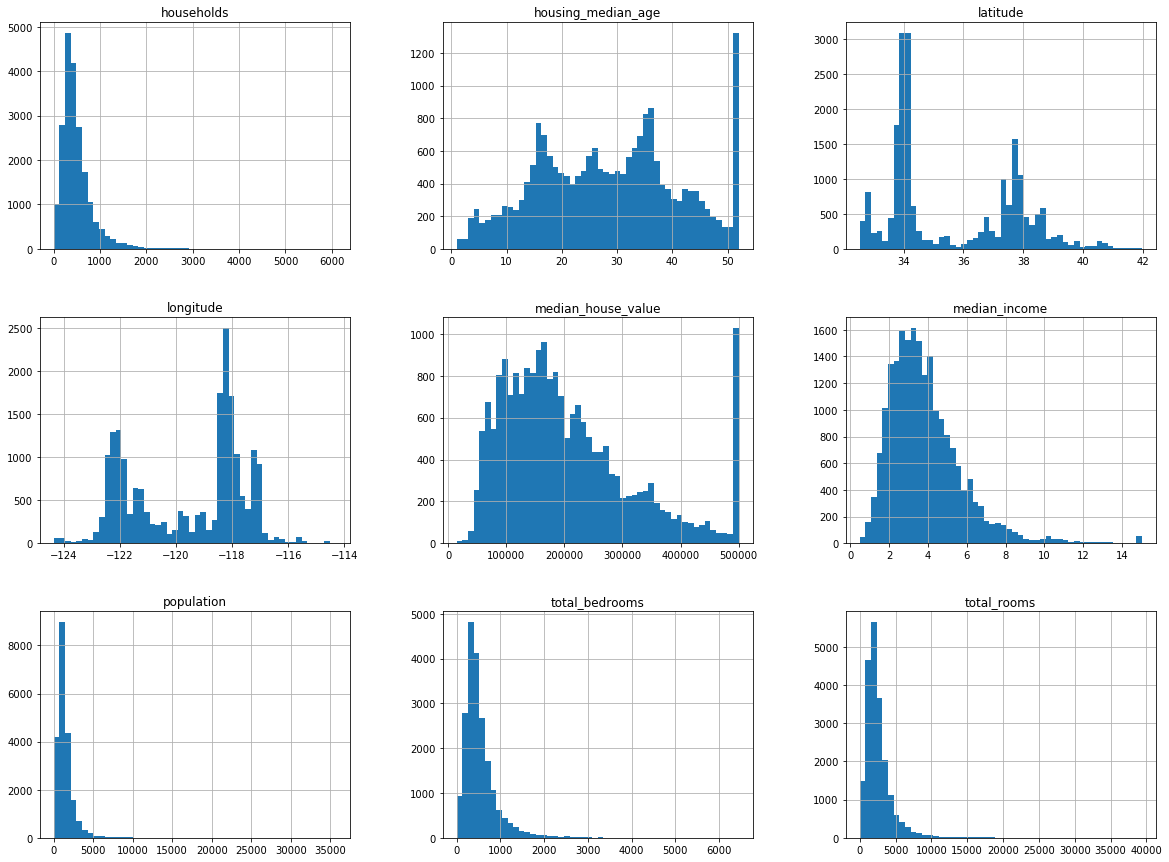

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

1.Working with preprocessed attributes is common in Machine Learning, and it is not necessarily a problem, but you should try to understand how the data was computed.  
2.These attributes have very different scales.   
3.many histograms are tail heavy: they extend much farther to the right of the median than to the left.

## 3.3 Create a Test Set

data snooping bias  
Creating a test set is theoretically quite simple: just pick some instances randomly, typically 20% of the dataset

### 3.3.1 type1

In [11]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [10]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


### 3.3.2 type2

In [13]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [ ]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [ ]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [ ]:
test_set.head()

### 3.3.3 type3

In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [20]:
test_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
15663    -122.44     37.80                52.0       3830.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
9814     -121.93     36.62                34.0       2351.0             NaN   

       population  households  median_income  median_house_value  \
20046      1392.0       359.0         1.6812             47700.0   
3024       1565.0       584.0         2.5313             45800.0   
15663      1310.0       963.0         3.4801            500001.0   
20484      1705.0       495.0         5.7376            218600.0   
9814       1063.0       428.0         3.7250            278000.0   

      ocean_proximity  
20046          INLAND  
3024           INLAND  
15663        NEAR BAY  
20484       <1H OCEAN  
9814       NEAR OCEAN

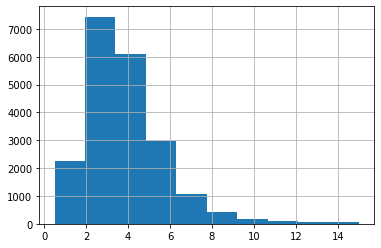

In [21]:
housing["median_income"].hist()

This means that you should not have too many strata, and each stratum should be large enough. The following code creates an income category attribute by dividing the median income by 1.5 (to limit the number of income cate‐ gories), and rounding up using ceil (to have discrete categories), and then merging all the categories greater than 5 into category 5

In [22]:
# Divide by 1.5 to limit the number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [23]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

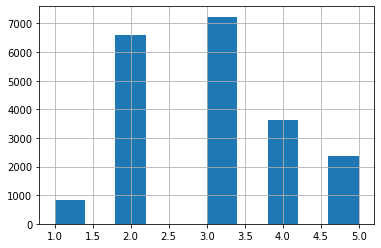

In [24]:
housing["income_cat"].hist()

Now you are ready to do stratified sampling based on the income category. For this you can use Scikit-Learn’s StratifiedShuffleSplit class

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [26]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [27]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [28]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [29]:
compare_props

Overall  Stratified    Random  Rand. %error  Strat. %error
1.0  0.039826    0.039729  0.040213      0.973236      -0.243309
2.0  0.318847    0.318798  0.324370      1.732260      -0.015195
3.0  0.350581    0.350533  0.358527      2.266446      -0.013820
4.0  0.176308    0.176357  0.167393     -5.056334       0.027480
5.0  0.114438    0.114583  0.109496     -4.318374       0.127011

 the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is quite skewed

remove the income_cat attribute so the data is back to its original state

In [30]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)